#libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Wine dataset

In [2]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Step 2: Split the data (70% training, 30% testing)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train an LDA model


In [4]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

# Step 4: Evaluate the model


LDA Model Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


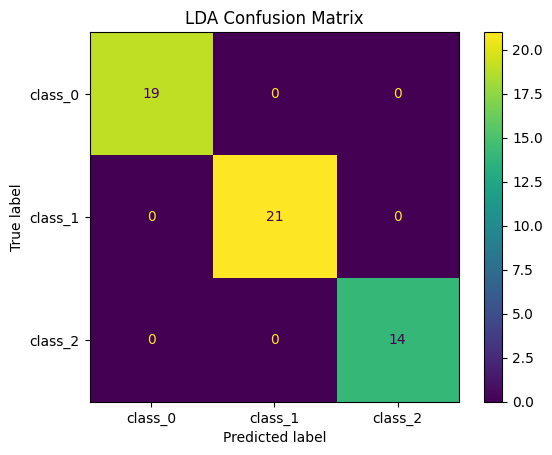

In [5]:
y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda, average='weighted')
recall_lda = recall_score(y_test, y_pred_lda, average='weighted')
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

print("LDA Model Performance:")
print(f"Accuracy: {accuracy_lda}")
print(f"Precision: {precision_lda}")
print(f"Recall: {recall_lda}")
ConfusionMatrixDisplay(conf_matrix_lda, display_labels=wine.target_names).plot()
plt.title("LDA Confusion Matrix")
plt.show()

# Step 5: Compare with Logistic Regression


# Scale the data

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression with increased iterations and a different solver


In [7]:
log_reg = LogisticRegression(max_iter=200, solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42, solver='liblinear')

# Evaluate the model



Logistic Regression Model Performance:
Accuracy: 0.9814814814814815
Precision: 0.9824074074074074
Recall: 0.9814814814814815


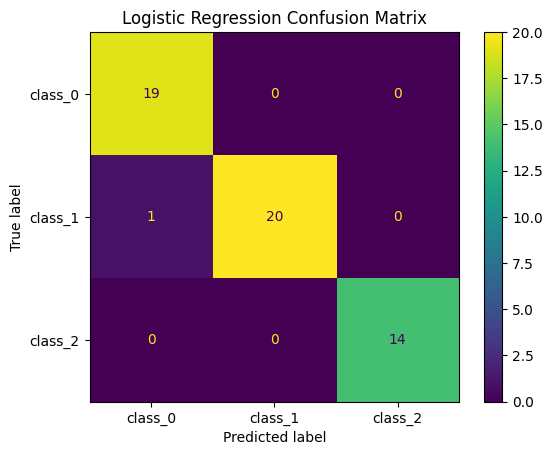

In [8]:
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy_log_reg}")
print(f"Precision: {precision_log_reg}")
print(f"Recall: {recall_log_reg}")
ConfusionMatrixDisplay(conf_matrix_log_reg, display_labels=wine.target_names).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Step 6: Visualize Decision Boundaries


# Reducing dataset to 2 dimensions using LDA for visualization


In [9]:
lda_2d = LinearDiscriminantAnalysis(n_components=2)
X_train_2d = lda_2d.fit_transform(X_train, y_train)
X_test_2d = lda_2d.transform(X_test)

plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

# LDA Decision Boundary

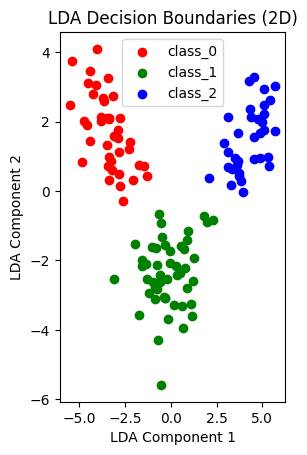

In [10]:
plt.subplot(1, 2, 1)
for i, color in zip(np.unique(y_train), ['r', 'g', 'b']):
    plt.scatter(X_train_2d[y_train == i, 0], X_train_2d[y_train == i, 1], label=wine.target_names[i], c=color)
plt.title("LDA Decision Boundaries (2D)")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend()

# Logistic Regression Boundary (using PCA for visualization, as Logistic Regression doesn't inherently reduce dimensions)


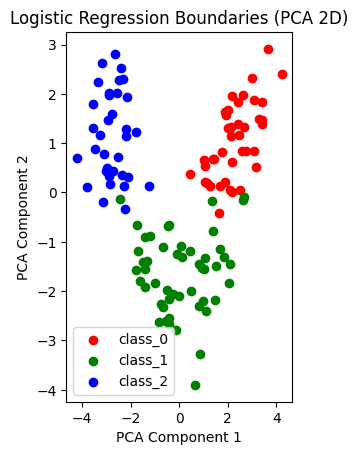

In [11]:
pca_2d = PCA(n_components=2)
X_train_pca = pca_2d.fit_transform(X_train)
X_test_pca = pca_2d.transform(X_test)

plt.subplot(1, 2, 2)
for i, color in zip(np.unique(y_train), ['r', 'g', 'b']):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=wine.target_names[i], c=color)
plt.title("Logistic Regression Boundaries (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.show()